Text(0, 0.5, 'True Positive')

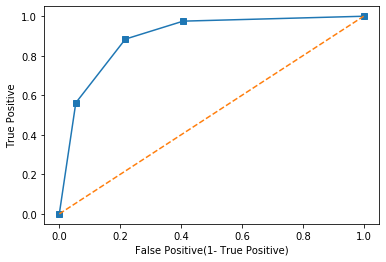

In [3]:
# ROC = Receive Operating Characteristics

# False Positive = Predict an event when there was no event.
# False Negative = Predict no event when in fact there was an event.

fp =[0,0.05426357,0.21705426,0.40697674,1]
tp = [0,0.56198347,0.88429752,0.97520661,1]

import matplotlib.pyplot as plt

plt.plot(fp,tp,marker = 's')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel("False Positive(1- True Positive)")
plt.ylabel("True Positive")

AUC: 0.895


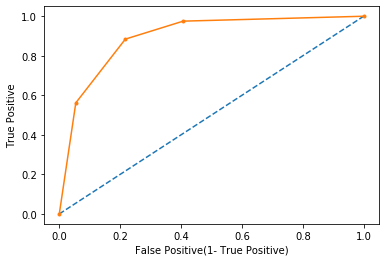

[0.         0.05426357 0.21705426 0.40697674 1.        ]
[0.         0.56198347 0.88429752 0.97520661 1.        ]


In [2]:
# Example 2

from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# fit a model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainX, trainy)

# predict probabilities
probs = model.predict_proba(testX)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)

import matplotlib.pyplot as plt

# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')

plt.xlabel("False Positive(1- True Positive)")
plt.ylabel("True Positive")

# show the plot
pyplot.show()

print(fpr)
print(tpr)